In [23]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

## Loading and REading 

In [24]:
### Parameters for DAS 
sample_rate = 25
dchan = 9.5714
ch_max = 4500  # max channel of each cable (4500 or 6000)
ch_itv=2  # channels are downsampled for faster picking

### Directories and files
raw_dir = '/fd1/QibinShi_data/akdas/qibin_data/'
out_dir = raw_dir + 'largerEQ_plots_test_picking_dec_ch' + str(ch_max) + '/'
record_time_file = 'recording_times_larger.csv'
qml = raw_dir + 'ak_Dec1_31_a120b065.xml'

In [25]:
### Read phase picks from the previous session
with h5py.File(out_dir + 'phase_picks.hdf5', 'r') as f: #filepaths should be 
    raw_picks = f["raw_alldata_picks"][:]
    one_picks = f["one_denoise_picks"][:]
    mul_picks = f["mul_denoise_picks"][:]
    pred_picks = f["predicted_picks"][:]
    array_dist = f["array_dist"][:]
    
### Read raw and denoised DAS
with h5py.File(raw_dir + 'KKFLStill2024_02_24.hdf5', 'r') as f:
    raw_quake_kkfls = f["raw_quake"][:, :4500, :] # original could be 500:5000, check 
    fk_quake_kkfls = f["fk_quake"][:, :4500, :]

with h5py.File(raw_dir + 'TERRAtill2024_02_24.hdf5', 'r') as f:
    raw_quake_terra = f["raw_quake"][:, :4500, :]
    fk_quake_terra = f["fk_quake"][:, :4500, :]


In [26]:
savedir = "/home/arose17/FM_Segmentation_DAS/src/data/pick_masking/"

In [27]:
#save one_picks as a csv
np.savetxt(savedir + 'p_mul_picks.csv', mul_picks[:,:,0, 0], delimiter=',', fmt='%s')


In [28]:
np.savetxt(savedir + 's_mul_picks.csv', mul_picks[:,:,1, 0], delimiter=',', fmt='%s')


In [29]:
raw_quake_kkfls.shape
raw_quake_terra.shape

#flip the terra data on the channel axis, the number of ea
quakes = np.concatenate((raw_quake_kkfls[:, ::-1, :], raw_quake_terra), axis=1)


In [30]:
quakes.shape

(95, 9000, 1500)

In [31]:
pred_picks.shape

(95, 4500, 2)

In [32]:
sampling_rate = 25 # hz

In [33]:
### Bandpass filter
b, a = butter(4, (0.5, 12), fs=sampling_rate, btype='bandpass')
filt = filtfilt(b, a, quakes, axis=2)
rawdata = filt / np.std(filt, axis=(1,2), keepdims=True)  ## Rawdata w.r.t. Denoised 

In [34]:
#print(highpass_quakes.shape)

In [35]:
# plt.figure(figsize=(10, 6))

# for i in range(0,95):
#     plt.imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     plt.scatter(pred_picks[i,:,1]*25, np.arange(0,9000, 2))
#     plt.savefig(savedir + "pred_picks/" + 'predpick_' + str(i) + '.png')
#     plt.close()



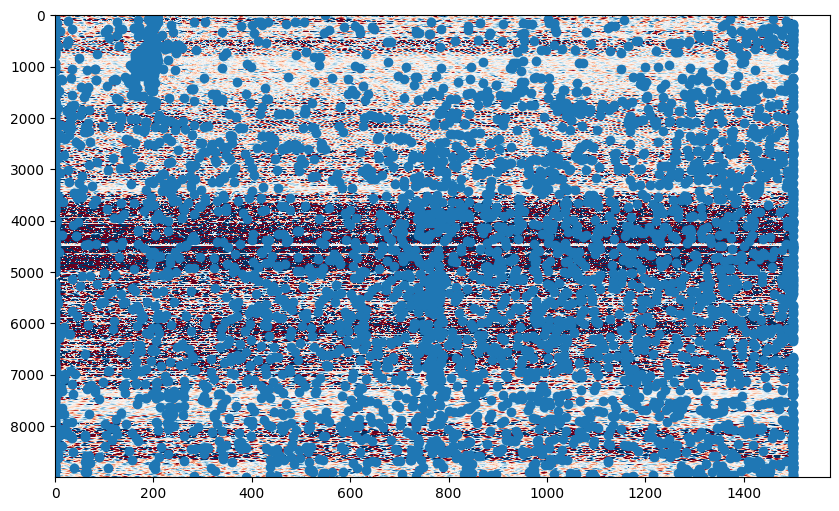

In [36]:
plt.figure(figsize=(10, 6))
plt.imshow(rawdata[45, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")

plt.scatter(one_picks[45,:,1,0]*25, np.arange(0,9000, 2))



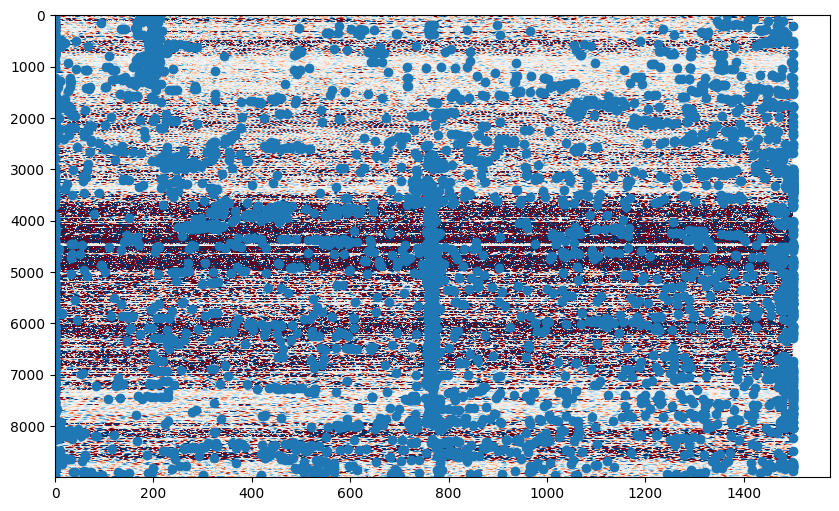

In [37]:
plt.figure(figsize=(10, 6))
plt.imshow(rawdata[45, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")

plt.scatter(mul_picks[45,:,1,0]*25, np.arange(0,9000, 2))



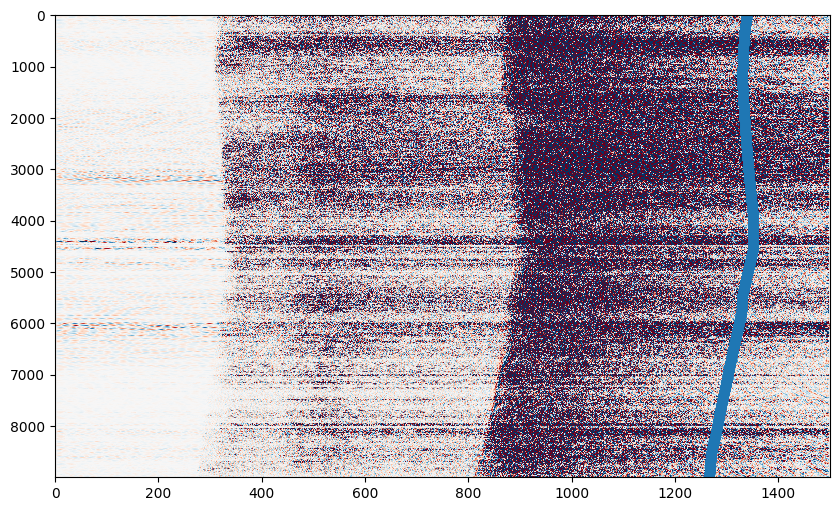

In [38]:
plt.figure(figsize=(10, 6))
plt.imshow(rawdata[32, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")

plt.scatter(pred_picks[32,:,1]*25, np.arange(0,9000, 2))



### For loops for finding which picks to utilize

In [39]:

# for i in range(0,95):
#     fig, axes = plt.subplots(2,1, figsize=(10, 10))
    
#     axes[0].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[0].scatter(pred_picks[i,:,0]*25, np.arange(0,9000, 2))
#     axes[0].set_title("pred_picks[i,:,0]")

#     axes[1].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[1].scatter(pred_picks[i,:,1]*25, np.arange(0,9000, 2))
#     axes[1].set_title("pred_picks[i,:,1]")

#     plt.savefig(savedir + "pred_picks/" + 'predpick_' + str(i) + '.png')
#     plt.close()

In [40]:

# for i in range(2,10):
#     fig, axes = plt.subplots(2,2, figsize=(10, 10))

#     axes[0,0].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[0,0].scatter(raw_picks[i,:, 0, 0]*25, np.arange(0,9000, 2))
#     axes[0,0].set_title("raw_picks[i,:,0,0]")

#     axes[1,0].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[1,0].scatter(raw_picks[i,:,1,0]*25, np.arange(0,9000, 2))
#     axes[1,0].set_title("raw_picks[i,:,1,0]")

#     axes[0,1].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[0,1].scatter(raw_picks[i,:, 0, 1]*25, np.arange(0,9000, 2))
#     axes[0,1].set_title("raw_picks[i,:,0,1]")

#     axes[1,1].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[1,1].scatter(raw_picks[i,:,1,1]*25, np.arange(0,9000, 2))
#     axes[1,1].set_title("raw_picks[i,:,1,1]")

#     plt.savefig(savedir + "raw_picks/" + 'rawpick_' + str(i) + '.png')
#     plt.close()

In [41]:
# for i in range(2,10):
#     fig, axes = plt.subplots(2,2, figsize=(10, 10))
#     axes[0,0].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[0,0].scatter(mul_picks[i,:, 0, 0]*25, np.arange(0,9000, 2))
#     axes[0,0].set_title("mul_picks[i,:,0,0]")

#     axes[1,0].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[1,0].scatter(mul_picks[i,:,1,0]*25, np.arange(0,9000, 2))
#     axes[1,0].set_title("mul_picks[i,:,1,0]")

#     axes[0,1].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[0,1].scatter(mul_picks[i,:, 0, 1]*25, np.arange(0,9000, 2))
#     axes[0,1].set_title("mul_picks[i,:,0,1]")

#     axes[1,1].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[1,1].scatter(mul_picks[i,:,1,1]*25, np.arange(0,9000, 2))
#     axes[1,1].set_title("mul_picks[i,:,1,1]")

#     plt.savefig(savedir + "mul_picks/" + 'mulpick_' + str(i) + '.png')
#     plt.close()

In [42]:
# for i in range(0,95):
#     fig, axes = plt.subplots(2,2, figsize=(10, 10))

#     axes[0,0].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[0,0].scatter(one_picks[i,:, 0, 0]*25, np.arange(0,9000, 2))
#     axes[0,0].set_title("one_picks[i,:,0,0]")

#     axes[1,0].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[1,0].scatter(one_picks[i,:,1,0]*25, np.arange(0,9000, 2))
#     axes[1,0].set_title("one_picks[i,:,1,0]")

#     axes[0,1].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[0,1].scatter(one_picks[i,:, 0, 1]*25, np.arange(0,9000, 2))
#     axes[0,1].set_title("one_picks[i,:,0,1]")

#     axes[1,1].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[1,1].scatter(one_picks[i,:,1,1]*25, np.arange(0,9000, 2))
#     axes[1,1].set_title("one_picks[i,:,1,1]")

#     plt.savefig(savedir + "one_picks/" + 'onepick_' + str(i) + '.png')
#     plt.close()

### For loop for plotting claned picks from other notebook

In [43]:
cleaned_p_waves = "/home/arose17/FM_Segmentation_DAS/src/data/pick_masking/cleaned_p_waves.npy"
cleaned_s_waves = "/home/arose17/FM_Segmentation_DAS/src/data/pick_masking/cleaned_s_waves.npy"

#open the numpy arrays
p_waves = np.load(cleaned_p_waves)
s_waves = np.load(cleaned_s_waves)

#create a for loop to plot the p waves and s waves 

In [45]:
p_waves.shape

(95, 4500)

In [52]:
for i in range(0,95):
    fig, axes = plt.subplots(1,2, figsize=(10, 6))
    axes[0].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
    axes[0].set_title("Raw Data")
    axes[0].set_ylabel("Channel Number")
    axes[0].set_xlabel("Sample Number")

    axes[1].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
    axes[1].scatter(p_waves[i]*25, np.arange(0,9000, 2), color = 'blue')
    axes[1].scatter(s_waves[i]*25, np.arange(0,9000, 2), color='red')    
    axes[1].set_title("P and S Waves overlaid on Raw Data")
    axes[1].legend(['P Wave', 'S Wave'])
    axes[1].set_xlabel("Sample Number")
    axes[1].set_yticks([])
    plt.tight_layout()
    plt.savefig("/home/arose17/FM_Segmentation_DAS/src/data/pick_masking/cleaned_picks_with_data/data_with_p_s_waves" + str(i) + '.png')
    plt.close()